In [2]:
import os
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from ModellingUtils import ModellingUtils

In [3]:
DATA_PATH = r'C:\Users\Lloyd Acha\Documents\ACHA_Files\Projects\Programming\DataSets\aclImdb_v1\aclImdb'

In [4]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 5
seed = 42

In [5]:
train_ds, class_names, val_ds = ModellingUtils.text_dataset_from_directory(
    os.path.join(DATA_PATH, 'train')
    )
test_ds = ModellingUtils.text_dataset_from_directory(
    os.path.join(DATA_PATH, 'test'), 
    subset = None, 
    validation_split = 0,
    seed = 0,
    validation = False
    )[0]

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [6]:
preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
model_url = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'

In [7]:
model = ModellingUtils.build_classifier_model(preprocess_url, model_url)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

4000/4000 [==============================] - 342s 85ms/step - loss: 7.6538 - binary_accuracy: 0.4981 - val_loss: 7.5087 - val_binary_accuracy: 0.5076


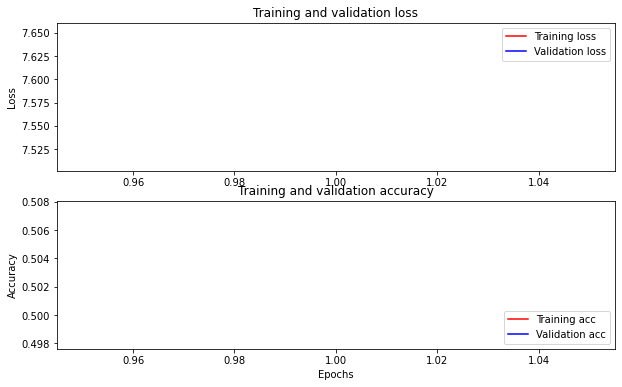

In [11]:
with tf.device('/gpu:0'):
    model = ModellingUtils.train_model(model, 
                                       data = train_ds, 
                                       epochs = 1, 
                                       validation_data = val_ds)

In [12]:
examples = [
    'this is such an amazing movie!',  # this is the same sentence tried earlier
    'The movie was great!',
    'The movie was terrible...',
]

In [13]:
results = tf.sigmoid(model(tf.constant(examples)))

In [23]:
f'score: {results[0][0]:.6f}'

'score: 0.999999'

In [31]:
results[0][0].numpy()

0.9999989

In [33]:
for x in results:
    print(x[0].numpy())
    break

0.9999989


In [34]:
[res[0].numpy() for res in results]

[0.9999989, 0.99999905, 0.99999905]